<a href="https://colab.research.google.com/github/driansee/MLforBeginners/blob/main/Latihan12_CNNCleanVSMessyRoom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import tensorflow as tf

# Tensorflow version info
print(tf.__version__)

2.8.2


In [90]:
# Mengunduh dataset
!wget --no-check-certificate \
  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2022-08-15 01:04:34--  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip
Resolving dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)... 205.185.216.42, 205.185.216.10
Connecting to dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)|205.185.216.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M   209MB/s    in 0.3s    

2022-08-15 01:04:34 (209 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [91]:
# Melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [92]:
# Menampilkan sub-direktori (‘clean’ gambar ruangan rapi dan ‘messy’ gambar ruangan berantakan)
os.listdir('/tmp/images/train')

['clean', 'messy']

In [93]:
# Menampilkan sub-direktori (‘clean’ gambar ruangan rapi dan ‘messy’ gambar ruangan berantakan)
os.listdir('/tmp/images/val')

['clean', 'messy']

In [94]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator (reportMissingImports)

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
                    rescale=1./255)

In [95]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # Direktori data latih
        target_size=(150, 150),  # Mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # Karena ini merupakan masalah klasifikasi 2 kelas, gunakan class_mode = 'binary'
        class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, # Direktori data validasi
        target_size=(150, 150), # Mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, 
        # Karena ini merupakan masalah klasifikasi 2 kelas gunakan class_mode = 'binary'
        class_mode='binary')

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [96]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [97]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 17, 17, 128)     

In [98]:
# Compile model dengan 'adam' optimizer loss function 'binary_crossentropy' 
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [99]:
# Latih model dengan model.fit 
model.fit(
      train_generator,
      steps_per_epoch=25,  # Berapa batch yang akan dieksekusi pada setiap epoch
      epochs=25, # Tambahkan epochs jika akurasi model belum optimal
      validation_data=validation_generator, # Menampilkan akurasi pengujian data validasi
      validation_steps=5,  # Berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/25
25/25 - 14s - loss: 0.7058 - accuracy: 0.5100 - val_loss: 0.6914 - val_accuracy: 0.5000 - 14s/epoch - 544ms/step
Epoch 2/25
25/25 - 13s - loss: 0.7104 - accuracy: 0.4900 - val_loss: 0.6931 - val_accuracy: 0.6000 - 13s/epoch - 532ms/step
Epoch 3/25
25/25 - 12s - loss: 0.7128 - accuracy: 0.5500 - val_loss: 0.6987 - val_accuracy: 0.5000 - 12s/epoch - 475ms/step
Epoch 4/25
25/25 - 12s - loss: 0.6950 - accuracy: 0.4900 - val_loss: 0.6932 - val_accuracy: 0.5000 - 12s/epoch - 470ms/step
Epoch 5/25
25/25 - 12s - loss: 0.6927 - accuracy: 0.5300 - val_loss: 0.6904 - val_accuracy: 0.5000 - 12s/epoch - 479ms/step
Epoch 6/25
25/25 - 12s - loss: 0.6845 - accuracy: 0.5400 - val_loss: 0.6637 - val_accuracy: 0.6000 - 12s/epoch - 470ms/step
Epoch 7/25
25/25 - 12s - loss: 0.6717 - accuracy: 0.5400 - val_loss: 0.7263 - val_accuracy: 0.5000 - 12s/epoch - 473ms/step
Epoch 8/25
25/25 - 13s - loss: 0.5947 - accuracy: 0.7500 - val_loss: 0.6008 - val_accuracy: 0.7500 - 13s/epoch - 508ms/step
Epoch 9/

Saving kamar.jpg to kamar (4).jpg
kamar.jpg
clean


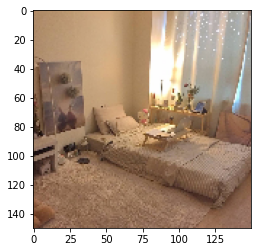

In [100]:
import numpy as np
from google.colab import files
# from tensorflow.keras.preprocessing import image (reportMissingImports)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # Predicting images
  path = fn
  img = tf.keras.preprocessing.image.load_img(path, target_size=(150,150))
 
  imgplot = plt.imshow(img)
  x = tf.keras.preprocessing.image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
 
  classes = model.predict(images, batch_size=10)  
  print(fn)
  if classes==1:
   print('messy')
  else:
   print('clean')